In [31]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [32]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

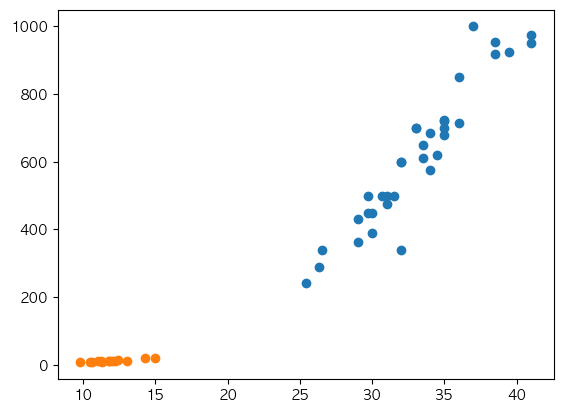

In [33]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

In [34]:
length = bream_length + smelt_length
weight = bream_weight+smelt_weight
results = [1]*35+[0]*14

In [35]:
len(length) # 49
len(bream_length) # 35
len(smelt_length) # 14

14

In [36]:
# zip 사용
datas = [[l,w,r] for l,w,r in zip(length,weight,results)]
df = pd.DataFrame(datas)
df.head()

,0,1,2
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


In [37]:
# # T 사용해서 해봄
# data = [length,weight,results]
# df = pd.DataFrame(data)
# df = df.T
# df.head()

In [38]:
# results는 따로 묶음
datas = [[l,w] for l,w in zip(length,weight)]


In [39]:
df = pd.DataFrame(datas)

In [40]:
# 데이터 shuffle - idx 리스트 1개 생성
idx = [i for i in range(49)]
random.shuffle(idx)

In [41]:
# 35 개 데이터를 분리
train_input = [datas[i] for i in idx[:35]]
test_input = [datas[i] for i in idx[35:]]

train_target = [results[i] for i in idx[:35]]
test_target = [results[i] for i in idx[35:]]

머신러닝 구현

In [42]:
# 1. 데이터 전처리 - Nan , 0, 타입, 표준화작업, 훈련세트, 테스트세트
# 2. 데이터 학습시키기
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 3. 데이터 예측하기
predict = clf.predict(test_input)
predict

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [43]:
test_target

[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]

In [44]:
score = clf.score(test_input,test_target)
print('정답룰 : ',score)

정답룰 :  1.0


In [48]:
# 실험 데이터로 확인
predict = clf.predict([[30,600]])
print('판별 : ',predict)

판별 :  [1]
